In [3]:
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
mpl.rcParams.update({'text.usetex': True,
                     'lines.linewidth': 4,
                     'font.size': 30,
                     'font.family': 'FreeSerif',
                     'figure.figsize': (16, 12),
                     'xtick.labelsize': 24, 
                     'ytick.labelsize': 24,
                     'legend.fontsize': 24,
                     'axes.labelsize': 24,
                     'axes.titlesize':30,
                     'axes.grid': True,
                     'grid.color': '#555555',
                     'lines.markersize': 12})
import matplotlib.pyplot as plt
mpl.style.use("dark_background")
import time
import copy

%matplotlib inline

# Chaos Tag Rules

1) Any group of two or more people can play. All players are active at the start of the game.

2) Active players can run around and tag other active players.

3) A player who is tagged becomes inactive and must sit on the spot where they were tagged.

4) An inactive player becomes active again when the player who tagged them is tagged.

5) Victory is achieved by being the only remaining active player.

Suppose $N$ of you are at the park that day. If all active players are equally likely to tag someone and any of the possible targets are equally likely to be tagged, how long will the game last on average, as measured in tags? (For example, with two players, the game always ends in one tag; with three players, the expected length of the game is three tags.)

In [28]:
N = 10  # Number of players in chaos tag
episodeNumber = 16000 # Number of simulations to run
plotEpisode = True
totalTags = np.zeros(episodeNumber, dtype=int)

In [29]:
startTime = time.time()
# Play Chaos Tag
for ii in np.arange(episodeNumber, dtype=int):
    tagTracker = 0
    maxTagged = 0
    
    playerDict = {key: np.array([], dtype=int) for key in np.arange(N, dtype=int)}
    activePlayers = np.arange(N, dtype=int)
    inactivePlayers = np.array([], dtype=int)
    
    while maxTagged < N - 1: # While at least two players still exist
        taggedPlayer = np.random.choice(activePlayers)  # Randomly select an active player to be tagged
        activePlayers   = np.delete(activePlayers, np.argwhere(activePlayers==taggedPlayer))
        inactivePlayers = np.append(inactivePlayers, taggedPlayer)
        
        taggingPlayer = np.random.choice(activePlayers) # Randomly select an active player to be the tagger
        
        
        playerDict[taggingPlayer] = np.append(playerDict[taggingPlayer], taggedPlayer) # Add the tagged player to the tagging player's tree
        
        for player in playerDict[taggedPlayer]:  # For each player in the tagged player's tree
            activePlayers   = np.append(activePlayers, player)         # Free them
            inactivePlayers = np.delete(inactivePlayers, np.argwhere(inactivePlayers==player) )
        playerDict[taggedPlayer] = np.array([], dtype=int) # Empty the tree
        
        tagTracker += 1
        
        for key in playerDict.keys():
            if len(playerDict[key]) > maxTagged:
                maxTagged = np.copy( len(playerDict[key]) )
        
#         if plotEpisode:
#         print 'Tagged Player:', taggedPlayer, ' Tagging Player:', taggingPlayer
#         print '# of Tags:', tagTracker 
#         print 'Active Players:', activePlayers
#         print 'Inactive Players:', inactivePlayers
#         print 'Player Dict:', playerDict
#         print
    totalTags[ii] = np.copy(tagTracker)
    if ii % 500 == 0:
        print ii, ' Game Over -- Total tags =', totalTags[ii]
    
expectedTags = np.sum(totalTags)/float(episodeNumber)
stdDevTags = np.sqrt( np.sum((totalTags - expectedTags)**2)/float(episodeNumber - 1) )
print '#####################'
print 'Expected Tags =', expectedTags, 'Standard Deviation =', stdDevTags
print 'for N =', N, 'players and', episodeNumber, 'episodes'
print 'Time =', time.time() - startTime, 'seconds'

0  Game Over -- Total tags = 289
500  Game Over -- Total tags = 262
1000  Game Over -- Total tags = 392
1500  Game Over -- Total tags = 263
2000  Game Over -- Total tags = 944
2500  Game Over -- Total tags = 331
3000  Game Over -- Total tags = 23
3500  Game Over -- Total tags = 666
4000  Game Over -- Total tags = 392
4500  Game Over -- Total tags = 1083
5000  Game Over -- Total tags = 130
5500  Game Over -- Total tags = 28
6000  Game Over -- Total tags = 1092
6500  Game Over -- Total tags = 1647
7000  Game Over -- Total tags = 374
7500  Game Over -- Total tags = 1280
8000  Game Over -- Total tags = 176
8500  Game Over -- Total tags = 63
9000  Game Over -- Total tags = 1702
9500  Game Over -- Total tags = 442
10000  Game Over -- Total tags = 1025
10500  Game Over -- Total tags = 510
11000  Game Over -- Total tags = 454
11500  Game Over -- Total tags = 21
12000  Game Over -- Total tags = 65
12500  Game Over -- Total tags = 53
13000  Game Over -- Total tags = 342
13500  Game Over -- Total

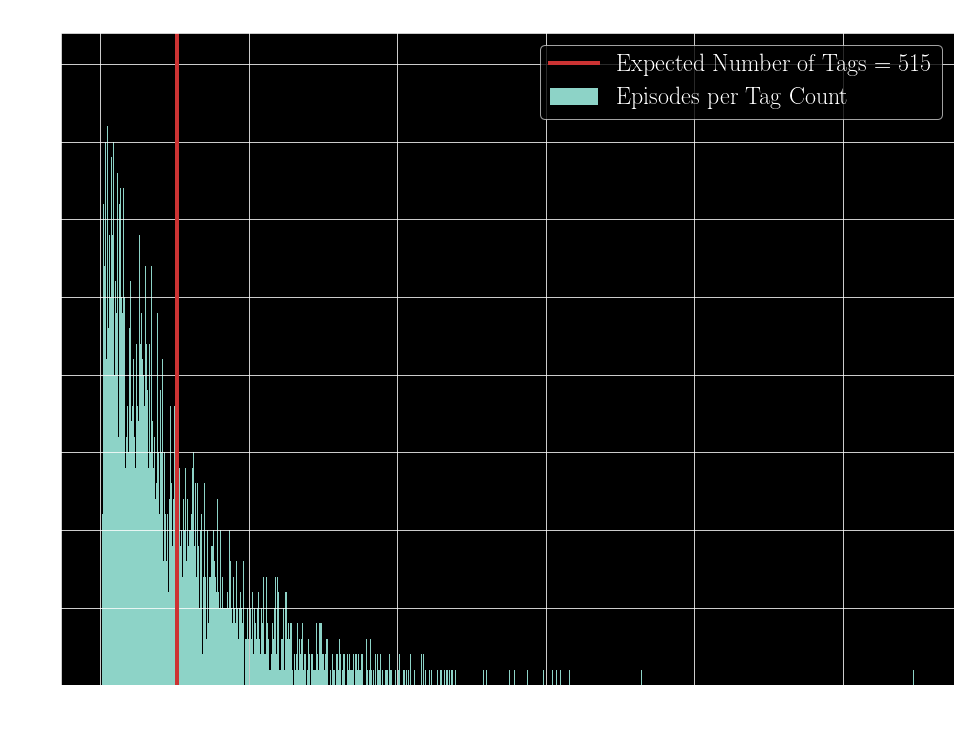

In [30]:
fig = plt.figure(figsize=(16,12))
n, bins, patches = plt.hist(totalTags, bins=(max(totalTags)-min(totalTags)), label=r'Episodes per Tag Count')
plt.axvline( expectedTags, color=[0.8, 0.2, 0.2], label=r'Expected Number of Tags = '+str(int(np.round(expectedTags))) )
plt.xlabel(r'Tags')
plt.ylabel(r'Episodes')
plt.title(r'Distribution of Tags for '+ str(N)+ ' Players and '+ str(episodeNumber)+ ' Episodes')
plt.legend()
plt.savefig('ChaosTagDistribution_'+str(N)+'Players_'+str(episodeNumber)+'Episodes.pdf')
plt.show()